In [7]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import keras
import os
import glob

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto(gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3))
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [8]:
from keras.models import load_model
model = load_model('inception_with_generator/model_3.h5')

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_91 (Conv2D)              (None, 125, 125, 8)  400         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 125, 125, 8)  32          conv2d_91[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_91 (LeakyReLU)      (None, 125, 125, 8)  0           batch_normalization_10[0][0]     
__________________________________________________________________________________________________
max_poolin

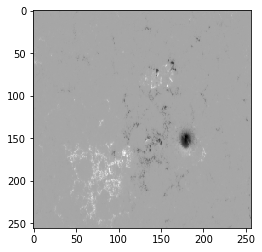

TypeError: visualize_cam() got an unexpected keyword argument 'keepdims'

In [19]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_cam
import matplotlib.pyplot as plt

layer_idx = utils.find_layer_idx(model, 'dense_10')
images = glob.glob('../shared/Data/HMI_LOS_SHARPS/valid_magnetograms/los/*_1.dat')
idx = 1
img = np.load(images[idx])
plt.imshow(img, cmap='gray')
plt.show()
img = img.reshape(1, img.shape[0], img.shape[1], 1)


model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

#grads = visualize_saliency(model, layer_idx, filter_indices=0, seed_input=img)
grads = visualize_cam(model, layer_idx, filter_indices=0, 
                              seed_input=img, keepdims=False)
print(grads.shape)
plt.imshow(grads, cmap='jet')
plt.show()